# ---
# # 1. Importation des librairies
# ---

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import unicodedata
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Téléchargement des ressources NLTK nécessaires (stopwords, wordnet)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ericcosterousse/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ericcosterousse/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ericcosterousse/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# ---
# # 2. Chargement du dataset
# ---

In [2]:
# Exemple de chargement CSV
df = pd.read_csv("../data/articles.csv")

# ---
# # 3. Affichage général et aperçu par section
# ---

In [3]:
print("Aperçu général du dataset :")
display(df.head())

print("\nAperçu par section :")
for section in df['section'].unique():
    print(f"\nSection: {section}")
    display(df[df['section'] == section])

Aperçu général du dataset :


,section,title,text
0,Business,Fuel tanker rates surge as Middle East crisis ...,two tankers have collided in waters off the un...
1,Business,UK bank TSB could be sold off by Spanish owner...,the spanish bank sabadell has said it has rece...
2,Business,World’s largest banks pledged $869bn to fossil...,the worlds largest banks boosted the amount of...
3,Business,Metro Bank sobers up and attracts a suitor | N...,some departures from the shrinking london stoc...
4,Business,Oxford Street will be pedestrianised as soon a...,sadiq khan has said he will pedestrianise oxfo...



Aperçu par section :

Section: Business


,section,title,text
0,Business,Fuel tanker rates surge as Middle East crisis ...,two tankers have collided in waters off the un...
1,Business,UK bank TSB could be sold off by Spanish owner...,the spanish bank sabadell has said it has rece...
2,Business,World’s largest banks pledged $869bn to fossil...,the worlds largest banks boosted the amount of...
3,Business,Metro Bank sobers up and attracts a suitor | N...,some departures from the shrinking london stoc...
4,Business,Oxford Street will be pedestrianised as soon a...,sadiq khan has said he will pedestrianise oxfo...
...,...,...,...
9995,Business,Thousands of UK pubs ‘face closure’ without en...,thousands of pubs face closure without urgent ...
9996,Business,European gas shortages likely to last several ...,gas shortages across europe are likely to last...
9997,Business,Business cuts to on-the-job training have made...,businesses have demanded governments invest mo...
9998,Business,Point of no return: crunch time as China tries...,china has reached a point of no return in its ...



Section: Politics


,section,title,text
10000,Politics,Louise Casey criticises Tories for politicisin...,keir starmer and donald trump signed off a uku...
10001,Politics,Britons in Israel told to notify Foreign Offic...,british people in israel are being told to reg...
10002,Politics,Keir Starmer’s biggest U-turns since Labour ca...,keir starmers midair announcement that he was ...
10003,Politics,"When Starmer speaks, the world listens – or so...",it was late into the night the phone rang in t...
10004,Politics,Cooper says law on rape being tightened so adu...,yvette cooper has condemned damning failures b...
...,...,...,...
19995,Politics,UK’s threat to Northern Ireland protocol is bo...,european union insiders have warned that the b...
19996,Politics,Brexit: why has row over Northern Ireland prot...,the uk is set for another bustup with the eu o...
19997,Politics,‘Has Trump learned his lesson?’ Sadiq Khan urg...,from a stage in the heart of silicon valley lo...
19998,Politics,Queen’s speech: Boris Johnson ‘bereft of ideas...,boris johnson was accused of being bereft of i...



Section: Culture


,section,title,text
20000,Culture,‘Nobody makes a record like that for the money...,jon king singer songwriter i grew up in a real...
20001,Culture,Eric Cantona and Ella Toone help meld football...,everybody needs his own ritual or way of prepa...
20002,Culture,"At a festival, are you Elinor or Marianne? | B...",your articles presented two entertaining but v...
20003,Culture,Speaking out on Gaza: Australian creatives and...,when michelle de kretser accepted the 2025 ste...
20004,Culture,‘A giant parenting group’: how online comedian...,many instagramfrequenting parents of small chi...
...,...,...,...
29995,Culture,"Grand Divisions, Melbourne festival | Event li...",outer urban projects bring their multidiscipli...
29996,Culture,"Hamlet, Canberra | Event listing",bell shakespeares hamlet starring josh mcconvi...
29997,Culture,"Hamlet, Sydney | Event listing",bell shakespeares hamlet starring josh mcconvi...
29998,Culture,The Hidden Brain: the podcast that isn't afrai...,shankar vedantam is nprs longtime science corr...



Section: Sport


,section,title,text
30000,Sport,Thunder move one win from first NBA title in 4...,the oklahoma city thunder moved within one win...
30001,Sport,Johnny Sexton insists he is ‘here to help’ Fin...,johnny sexton has insisted he is here to help ...
30002,Sport,Dan Evans reproduces form of old to beat Franc...,dan evans opened up the mens tournament at que...
30003,Sport,Royal Ascot ready to roll with MPs worried fut...,hundreds of staff were putting the finishing t...
30004,Sport,The trial that gripped Norway like a soap oper...,the moment that ripped apart track and fields ...
...,...,...,...
39995,Sport,Ashes diary: Barmy Army’s trumpeter passes fit...,it has been an intense series and the past six...
39996,Sport,Celine Boutier wins the 2023 Evian Championshi...,so in celine boutier france can finally celebr...
39997,Sport,"Toby Greene: studs up, chest out and jaw jutte...",one of the most extraordinary quarters of the ...
39998,Sport,Max Verstappen cruises to Belgian GP win despi...,now i am off peace and love verstappen red bul...



Section: Technology


,section,title,text
40000,Technology,Makers of air fryers and smart speakers told t...,makers of air fryers smart speakers fertility ...
40001,Technology,"Liverpool is crypto capital of UK, survey finds",the citys most famous sons may have sung that ...
40002,Technology,UK government rollout of Humphrey AI tool rais...,the governments artificial intelligence ai too...
40003,Technology,Hey AI! Can ChatGPT help you to manage your mo...,artificial intelligence seems to have touched ...
40004,Technology,Workers in UK need to embrace AI or risk being...,workers in the uk should turn their trepidatio...
...,...,...,...
49995,Technology,Hundreds of Uber drivers go unpaid after banki...,hundreds of uber drivers have not been paid th...
49996,Technology,Ctrl+Z: Silicon Valley leaders U-turn on Donal...,in the end it took less than 24 hours for sili...
49997,Technology,Virtual reality firms revive video arcades as ...,above me is the hillary step a sheer vertical ...
49998,Technology,Want a pair of Snap Specs? That'll set you bac...,want a pair of spectacles the new camera equip...



Section: World news


,section,title,text
50000,World news,Iran and Israel trade more attacks as Trump de...,china has said some of its citizens have been ...
50001,World news,‘They were my everything’: tributes paid as na...,tributes are being made to the passengers who ...
50002,World news,At least 15 die in Russian strikes on Kyiv in ...,on the g7 summit in canada my colleagues patri...
50003,World news,Church of England should rethink automatic sec...,church of england proposals for church courts ...
50004,World news,"Iran-Israel ceasefire offer has been made, say...",donald trump dramatically left the g7 summit i...
...,...,...,...
59995,World news,Food aid convoy for northern Gaza looted after...,a new drive by the united nations world food p...
59996,World news,Dutch ministers trying to stop tech firm ASML ...,the dutch government is scrambling to ensure t...
59997,World news,Von der Leyen’s EU group plans Rwanda-style as...,the european commission chief ursula von der l...
59998,World news,Russia-Ukraine war live: Britain ‘prepared to ...,it is now just after 6pm in kyiv here is a sum...


In [4]:
print("\nAperçu d'un titre d'article :")
df['title'][30101]


Aperçu d'un titre d'article :


'Ben Duckett blows West Indies away as England wrap up T20 series sweep'

In [5]:
print("\nAperçu d'un text d'article :")
df['text'][30101]


Aperçu d'un text d'article :


'harry brook hit an unbeaten 35 off 22 balls a quickfire cameo on a usual night yet the slowest of englands offerings in this recordbreaking contest his side piled up 248 for three their highest total at home in this format to set up a 37run victory over west indies in the third and final twenty20 international ben duckett topscored with 84 off 46 balls as he shared a rollicking opening stand of 120 with jamie smith 135 brought up at the 10over mark the destruction calmed down a touch thereafter but west indies were still invited to pull off their highest successful t20 chase it never felt on even as evin lewis whipped away a firstball six rovman powell provided respectability with 79 not out off 45 but the reply demanded something gargantuan the visitors depart without a victory across six whiteball matches west indies pain on this tour has not been restricted to the losing streak monday bringing the news of nicholas poorans retirement from international cricket their former whiteball

# ---
# # 4. Classe Preprocessing
# ---

In [6]:
class Preprocessing:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.stop_words.update(['u', 'us', 'q', 'g'])
        self.lemmatizer = WordNetLemmatizer()

    def clean_text(self, text):
        """
        Nettoyage du texte : minuscules, suppression HTML, ponctuation, chiffres, espaces multiples.
        """
        if not isinstance(text, str):
            return ""

        text = text.lower()
        # Normalisation unicode (accents etc.)
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    
        # Supprimer les URLs (http, https, www)
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
        # Supprimer les emails
        text = re.sub(r'\S+@\S+', '', text)
    
        # Supprimer ponctuation et chiffres, garder lettres et espaces uniquement
        # (on enlève aussi les acronymes avec points en une fois)
        text = re.sub(r'\b[a-z]\.', '', text)  # enlever lettres suivies d'un point (ex: u.)
        text = re.sub(r'[^a-z\s]', ' ', text)  # garder lettres et espaces uniquement
    
        # Enlever espaces multiples
        text = re.sub(r'\s+', ' ', text).strip()
    
        return text
    
    def tokenize(self, text):
        """
        Tokenisation simple par split des mots.
        """
        return text.split()
    
    def remove_stopwords(self, tokens):
        """
        Suppression des stopwords.
        """
        filtered = [token for token in tokens if token not in self.stop_words]  
        return filtered
    
    def lemmatize(self, tokens):
        """
        Lemmatisation des tokens.
        """
        return [self.lemmatizer.lemmatize(token) for token in tokens]
    
    def preprocess(self, text):
        """
        Pipeline complet combinant toutes les étapes
        """
        cleaned = self.clean_text(text)
        tokens = self.tokenize(cleaned)
        no_stop = self.remove_stopwords(tokens)
        lemmas = self.lemmatize(no_stop)
        return " ".join(lemmas)

# ---
# # 5. Test de la classe sur un article codé en dur
# ---

In [7]:
preprocessor = Preprocessing()

test_article = """
Breaking News! The U.S. economy grew by 3.2% in Q2 2023. 
Investors are excited — stocks soared!!! But beware of risks... 
Contact us at info@example.com or visit https://news.com.
"""
print("Texte original :")
print(test_article)

cleaned_test_article = preprocessor.preprocess(test_article)
print("\nTexte après prétraitement :")
print(cleaned_test_article)

Texte original :

Breaking News! The U.S. economy grew by 3.2% in Q2 2023. 
Investors are excited — stocks soared!!! But beware of risks... 
Contact us at info@example.com or visit https://news.com.


Texte après prétraitement :
breaking news economy grew investor excited stock soared beware risk contact visit


# ---
# # 6. Application du preprocessing sur le dataset
# ---

In [8]:
# Prendre le premier article de chaque section
df_sample = df.groupby('section').head(1).copy()

#Appliquer le prétraitement sur cet échantillon
df_sample['cleaned_text'] = df_sample['text'].apply(preprocessor.preprocess)


=== Article index 0 - Section: Business ===


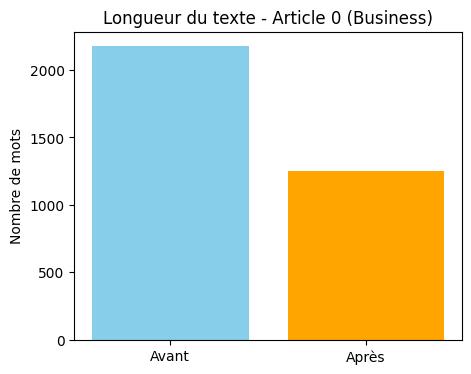

Top 10 mots avant prétraitement : [('the', 139), ('to', 62), ('of', 52), ('in', 45), ('and', 38), ('a', 38), ('that', 36), ('for', 25), ('is', 23), ('oil', 21)]
Top 10 mots après prétraitement : [('oil', 21), ('iran', 16), ('said', 13), ('market', 12), ('price', 12), ('point', 12), ('uk', 11), ('israel', 10), ('east', 9), ('could', 8)]


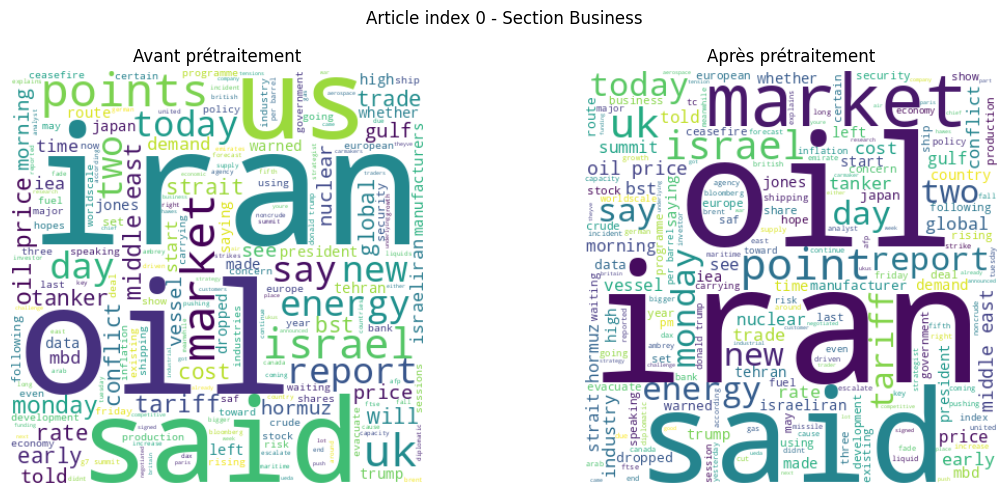


=== Article index 10000 - Section: Politics ===


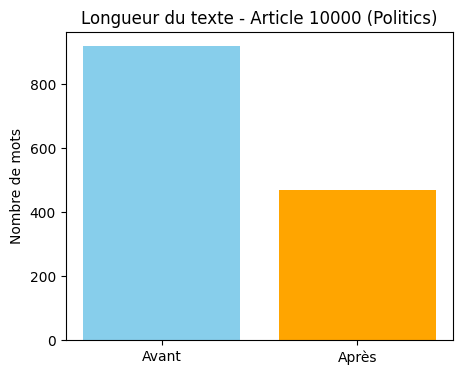

Top 10 mots avant prétraitement : [('the', 46), ('to', 26), ('and', 20), ('a', 18), ('i', 17), ('it', 17), ('in', 14), ('on', 13), ('at', 12), ('that', 12)]
Top 10 mots après prétraitement : [('tariff', 5), ('report', 5), ('still', 5), ('message', 5), ('yesterday', 4), ('casey', 4), ('felt', 4), ('time', 4), ('pm', 4), ('starmer', 3)]


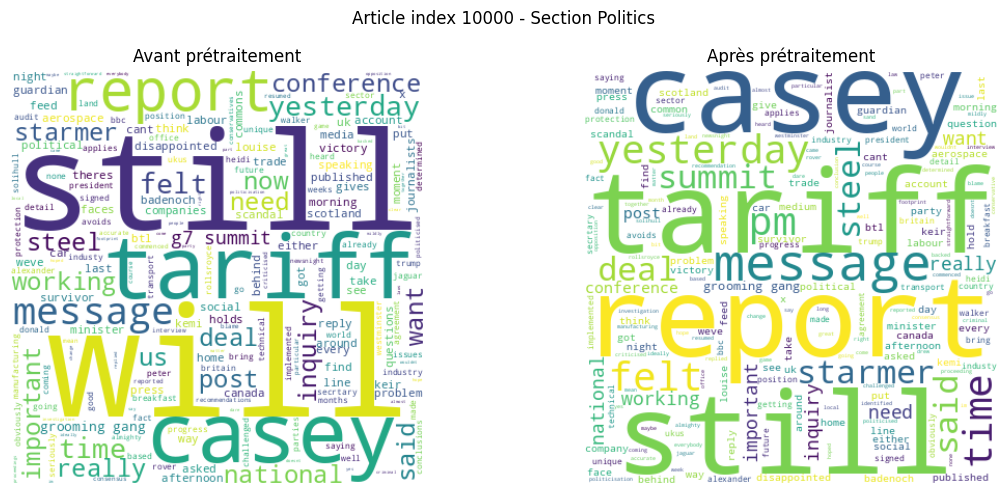


=== Article index 20000 - Section: Culture ===


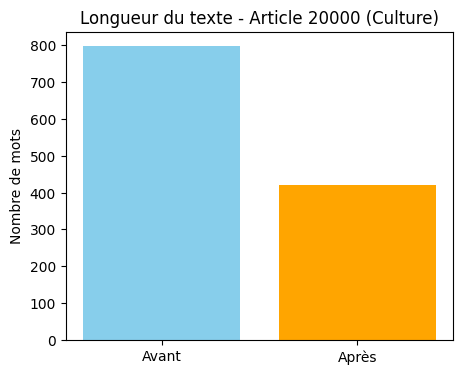

Top 10 mots avant prétraitement : [('the', 46), ('and', 24), ('a', 22), ('to', 20), ('we', 17), ('i', 14), ('of', 14), ('on', 13), ('in', 12), ('was', 12)]
Top 10 mots après prétraitement : [('like', 7), ('song', 6), ('entertainment', 5), ('recorded', 4), ('jon', 3), ('leeds', 3), ('came', 3), ('andy', 3), ('four', 3), ('band', 3)]


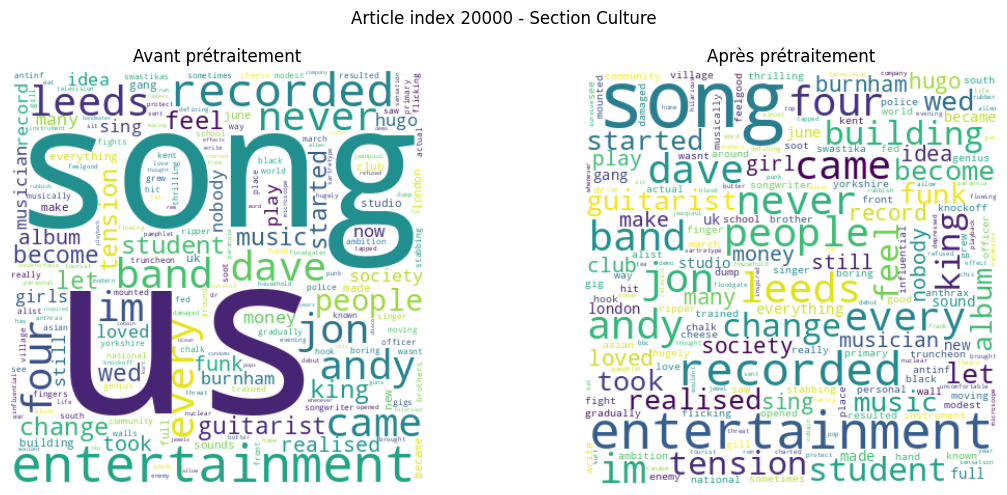


=== Article index 30000 - Section: Sport ===


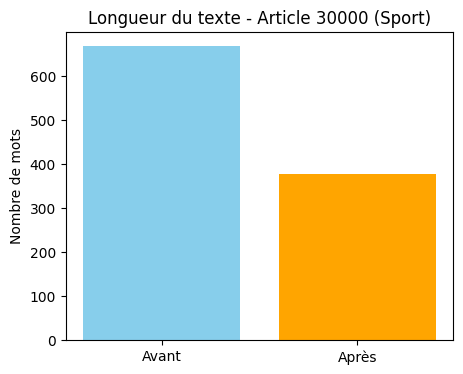

Top 10 mots avant prétraitement : [('the', 43), ('in', 21), ('a', 21), ('and', 16), ('to', 14), ('of', 12), ('pacers', 9), ('game', 9), ('indiana', 8), ('points', 8)]
Top 10 mots après prétraitement : [('indiana', 10), ('game', 10), ('point', 10), ('pacer', 9), ('oklahoma', 7), ('city', 7), ('thunder', 7), ('first', 7), ('williams', 6), ('time', 6)]


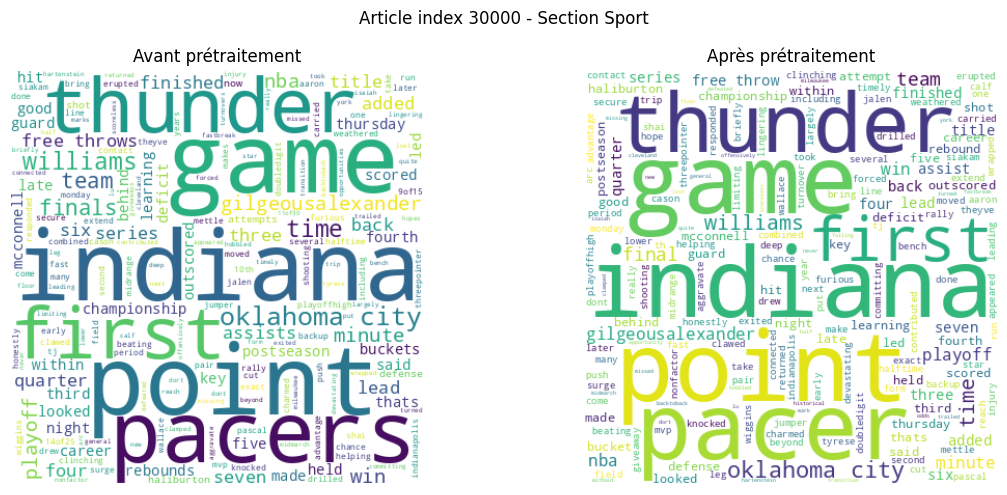


=== Article index 40000 - Section: Technology ===


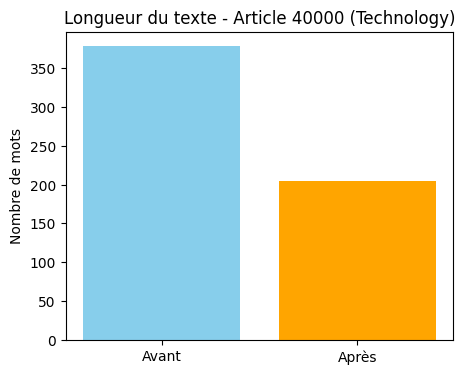

Top 10 mots avant prétraitement : [('to', 18), ('the', 14), ('and', 13), ('of', 12), ('information', 10), ('their', 9), ('we', 8), ('smart', 7), ('that', 7), ('data', 6)]
Top 10 mots après prétraitement : [('information', 10), ('smart', 7), ('people', 6), ('data', 6), ('personal', 5), ('product', 5), ('privacy', 4), ('collect', 4), ('manufacturer', 4), ('ico', 3)]


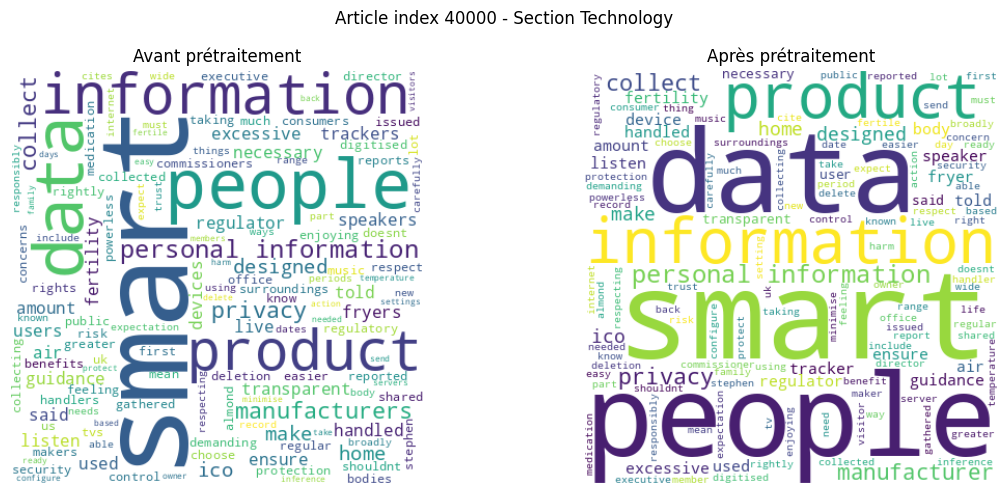


=== Article index 50000 - Section: World news ===


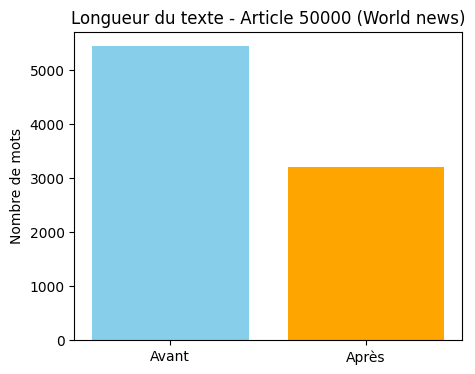

Top 10 mots avant prétraitement : [('the', 287), ('in', 145), ('to', 142), ('of', 141), ('a', 131), ('and', 113), ('on', 87), ('that', 66), ('israel', 63), ('iran', 61)]
Top 10 mots après prétraitement : [('iran', 71), ('israel', 66), ('said', 59), ('trump', 43), ('israeli', 40), ('report', 30), ('tehran', 27), ('iranian', 25), ('military', 24), ('people', 21)]


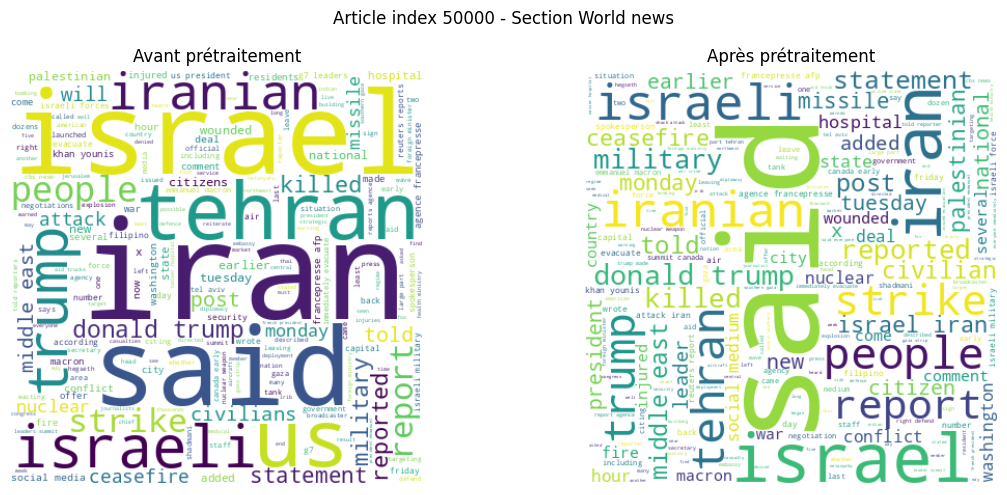

In [9]:
for i, row in df_sample.iterrows():
    print(f"\n=== Article index {i} - Section: {row['section']} ===")
    
    original_text = str(row['text'])
    cleaned_text = str(row['cleaned_text'])
    
    # Longueurs
    original_len = len(original_text.split())
    cleaned_len = len(cleaned_text.split())
    lengths = [original_len, cleaned_len]
    labels = ['Avant', 'Après']
    
    plt.figure(figsize=(5,4))
    plt.bar(labels, lengths, color=['skyblue', 'orange'])
    plt.ylabel("Nombre de mots")
    plt.title(f"Longueur du texte - Article {i} ({row['section']})")
    plt.show()
    
    # Top 10 mots
    original_freq = Counter(original_text.split()).most_common(10)
    cleaned_freq = Counter(cleaned_text.split()).most_common(10)
    
    print("Top 10 mots avant prétraitement :", original_freq)
    print("Top 10 mots après prétraitement :", cleaned_freq)
    
    # Wordclouds
    fig, axs = plt.subplots(1, 2, figsize=(12,5))
    
    wordcloud_orig = WordCloud(width=400, height=400, background_color='white').generate(original_text)
    axs[0].imshow(wordcloud_orig, interpolation='bilinear')
    axs[0].axis('off')
    axs[0].set_title("Avant prétraitement")
    
    wordcloud_clean = WordCloud(width=400, height=400, background_color='white').generate(cleaned_text)
    axs[1].imshow(wordcloud_clean, interpolation='bilinear')
    axs[1].axis('off')
    axs[1].set_title("Après prétraitement")
    
    plt.suptitle(f"Article index {i} - Section {row['section']}")
    plt.tight_layout()
    plt.show()

# ---
# # 7. Préparation des données pour l'embeddings
# ---

In [10]:
# Chargement des textes nettoyés
corpus = df_sample['cleaned_text'].tolist()
sections = df_sample['section'].tolist()

# Affichage du corpus
for i, doc in enumerate(corpus):
    print(f"Article {i+1}: '{doc}'")


Article 1: 'two tanker collided water united arab emirate caught fire early hour morning united arab emirate coast guard say evacuated people oil tanker adalynn following collision two ship gulf oman near strait hormuz british maritime security firm ambrey said cause incident securityrelated daniel smith analyst ambrey said via bloomberg time writing confirm security incident continue investigate cause global oil supply set increase far faster demand coming year international energy agency predicted new report iea argues oil market undergoing structural change key driver supply demand growth past year start fade iea estimate global oil demand forecast increase million barrel per day mbd reaching plateau around mbd end decade time global oil production capacity forecast rise mbd mbd due increased output canada brazil guyana argentina unwinding production cut opec group iea say growth set dominated robust gain natural gas liquid ngls noncrude liquid strategic shift towards higher noncrud

# ---
# # 8. Bag of Words (BoW)
# ---

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Création du modèle BoW
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(corpus)

# Extraction du vocabulaire
vocab = bow_vectorizer.get_feature_names_out()
print(f"📚 Vocabulaire ({len(vocab)} mots):")
print(list(vocab))

# Création de la matrice BoW sous forme de DataFrame
bow_df = pd.DataFrame(
    bow_matrix.toarray(),
    columns=vocab,
    index=sections
)

# Affichage de la matrice BoW
print("\n📊 Matrice BoW :")
print(bow_df)


📚 Vocabulaire (2152 mots):
['aaron', 'abbas', 'abc', 'able', 'abortion', 'absence', 'absent', 'accommodation', 'accomplished', 'according', 'account', 'accurate', 'across', 'act', 'action', 'actual', 'adalynn', 'add', 'added', 'adding', 'additional', 'administers', 'adraee', 'adult', 'advanced', 'advantage', 'advised', 'advisory', 'aeroplane', 'aerospace', 'affair', 'affect', 'affected', 'affecting', 'affirm', 'affirmed', 'afp', 'africa', 'afternoon', 'agence', 'agency', 'agenda', 'aggravate', 'aggression', 'aggressor', 'ago', 'agreed', 'agreement', 'ahead', 'aid', 'aileen', 'aimed', 'aiming', 'air', 'aircraft', 'airline', 'airspace', 'alanbiya', 'album', 'alexander', 'ali', 'alike', 'alist', 'allen', 'allow', 'alltime', 'almighty', 'almond', 'almost', 'along', 'alongside', 'already', 'also', 'always', 'amazed', 'ambassador', 'ambition', 'ambrey', 'amendment', 'america', 'american', 'amid', 'amman', 'among', 'amount', 'amp', 'ana', 'analyst', 'andrew', 'andrewsparrow', 'andrewsparrowgd

# ---
# # 9. TF - IDF (Term Frequency - Inverse Document Frequency)
# ---

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Création du modèle TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Vocabulaire
vocab = tfidf_vectorizer.get_feature_names_out()

# DataFrame TF-IDF
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=vocab,
    index=sections
)

# Affichage de la matrice TF-IDF
print("📊 Matrice TF-IDF (arrondie à 3 décimales) :")
print(tfidf_df.round(3))


📊 Matrice TF-IDF (arrondie à 3 décimales) :
            aaron  abbas    abc   able  abortion  absence  absent  \
Business    0.000  0.000  0.000  0.000     0.000    0.018   0.000   
Politics    0.000  0.000  0.000  0.000     0.042    0.000   0.000   
Culture     0.000  0.000  0.000  0.000     0.000    0.000   0.000   
Sport       0.033  0.000  0.000  0.000     0.000    0.000   0.000   
Technology  0.000  0.000  0.000  0.040     0.000    0.000   0.000   
World news  0.000  0.007  0.007  0.006     0.000    0.000   0.007   

            accommodation  accomplished  according  ...    yes  yesterday  \
Business            0.000         0.000      0.030  ...  0.000      0.030   
Politics            0.000         0.000      0.000  ...  0.042      0.137   
Culture             0.000         0.000      0.000  ...  0.000      0.000   
Sport               0.000         0.000      0.000  ...  0.000      0.000   
Technology          0.000         0.000      0.000  ...  0.000      0.000   
World news

### Analyse manuelle TF-IDF d'un mot

In [49]:
import numpy as np

mot_exemple = "iran"
total_docs = len(corpus)

print(f"=== Pour le mot '{mot_exemple}' ===")
if mot_exemple not in bow_df.columns:
    print(f"❌ Le mot '{mot_exemple}' n'est pas présent.")
else:
    df = (bow_df[mot_exemple] > 0).sum()
    idf = np.log(total_docs / df)

    print(f"➡️ DF = {df} / {total_docs}")
    print(f"➡️ IDF = log({total_docs}/{df}) = {idf:.3f}")

    for i in range(total_docs):
        doc_name = bow_df.index[i]
        tf = bow_df.loc[doc_name, mot_exemple]
        doc_length = bow_df.loc[doc_name].sum()
        tf_normalized = tf / doc_length if doc_length > 0 else 0
        tfidf_manual = tf_normalized * idf
        tfidf_sklearn = tfidf_df.loc[doc_name, mot_exemple]

        print(f"\n📄 {doc_name}")
        print(f"TF = {tf}/{doc_length} = {tf_normalized:.3f}")
        print(f"TF-IDF (manuel) = {tfidf_manual:.3f}")
        print(f"TF-IDF (sklearn) = {tfidf_sklearn:.3f}")


=== Pour le mot 'iran' ===
➡️ DF = 2 / 6
➡️ IDF = log(6/2) = 1.099

📄 Business
TF = 16/1255 = 0.013
TF-IDF (manuel) = 0.014
TF-IDF (sklearn) = 0.240

📄 Politics
TF = 0/466 = 0.000
TF-IDF (manuel) = 0.000
TF-IDF (sklearn) = 0.000

📄 Culture
TF = 0/421 = 0.000
TF-IDF (manuel) = 0.000
TF-IDF (sklearn) = 0.000

📄 Sport
TF = 0/377 = 0.000
TF-IDF (manuel) = 0.000
TF-IDF (sklearn) = 0.000

📄 Technology
TF = 0/205 = 0.000
TF-IDF (manuel) = 0.000
TF-IDF (sklearn) = 0.000

📄 World news
TF = 71/3186 = 0.022
TF-IDF (manuel) = 0.024
TF-IDF (sklearn) = 0.391


# ---
# # 10. Embeddings avec Word2Vec (Gensim)
# ---

In [14]:
from gensim.models import Word2Vec

# Préparation des phrases
sentences = df_sample['cleaned_text'].apply(str.split).tolist()

# Création du modèle Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Exploration du vocabulaire
vocabulaire = list(model.wv.index_to_key)
print(f"📚 20 premiers mots du Vocabulaire appris : \n {vocabulaire[:20]}")


📚 20 premiers mots du Vocabulaire appris : 
 ['iran', 'said', 'israel', 'trump', 'report', 'israeli', 'people', 'tehran', 'iranian', 'told', 'president', 'military', 'point', 'nuclear', 'also', 'east', 'donald', 'oil', 'strike', 'middle']


### 🔍 similarité entre paires de mots 

In [15]:
test_pairs = [
    ("arab", "emirate"),
    ("signed", "trade"),
    ("village", "songwriter"),
    ("thunder", "nba"),
    ("fertility", "maker"),
    ("citizen", "report")
]

for word1, word2 in test_pairs:
    try:
        sim = model.wv.similarity(word1, word2)
        print(f"📊 '{word1}' ↔ '{word2}' : {sim:.3f}")
    except KeyError as e:
        print(f"❌ Mot non trouvé : {e}")


📊 'arab' ↔ 'emirate' : -0.131
📊 'signed' ↔ 'trade' : 0.132
📊 'village' ↔ 'songwriter' : -0.003
📊 'thunder' ↔ 'nba' : 0.125
📊 'fertility' ↔ 'maker' : 0.091
📊 'citizen' ↔ 'report' : -0.014


### 🎯 Mots les plus proches 

In [16]:
test_words = ["rugby", "village", "citizen", "iran"]

for word in test_words:
    try:
        similar_words = model.wv.most_similar(word, topn=5)
        print(f"\n🔍 '{word}' :")
        for similar_word, score in similar_words:
            print(f"  {score:.3f} → {similar_word}")
    except KeyError:
        print(f"❌ Mot '{word}' non trouvé.")



🔍 'rugby' :
  0.341 → fastbreak
  0.320 → lurched
  0.307 → carrrier
  0.298 → lost
  0.281 → pushing

🔍 'village' :
  0.375 → justice
  0.318 → key
  0.315 → disruption
  0.313 → barrel
  0.307 → sometimes

🔍 'citizen' :
  0.346 → gain
  0.336 → fire
  0.313 → houseboat
  0.300 → life
  0.295 → hydrogenpowered

🔍 'iran' :
  0.415 → fire
  0.371 → fox
  0.356 → donald
  0.341 → told
  0.336 → member


### 🖼️ Visualisation des Word Embeddings (t-SNE)

/Users/ericcosterousse/.pyenv/versions/3.11.0/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


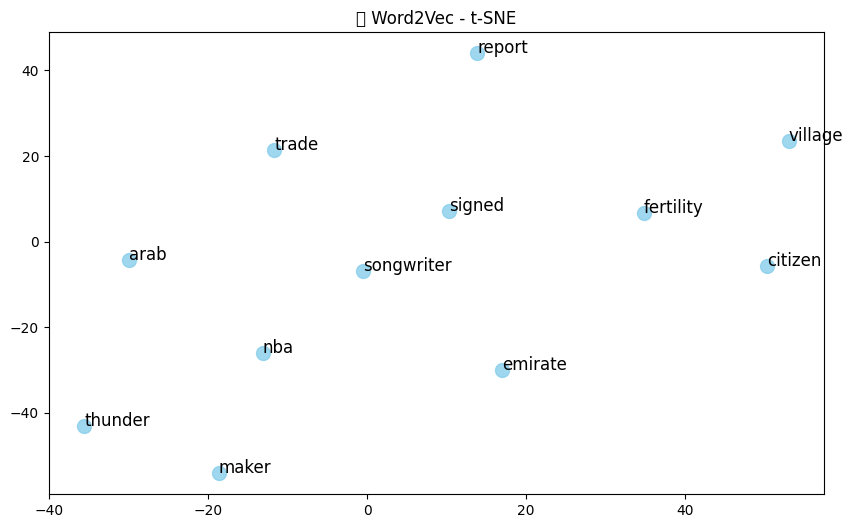

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

words_to_plot = list(set([w for pair in test_pairs for w in pair]))

vectors = []
valid_words = []

for word in words_to_plot:
    try:
        vectors.append(model.wv[word])
        valid_words.append(word)
    except KeyError:
        continue

if len(vectors) >= 2:
    vectors_array = np.array(vectors)
    # Choix d'un perplexity sûr : minimum entre 5 et nombre de vecteurs -1
    perplexity_val = min(5, len(vectors) - 1)
    
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_val)
    vectors_2d = tsne.fit_transform(vectors_array)

    plt.figure(figsize=(10, 6))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], s=100, c='skyblue', alpha=0.8)
    for i, word in enumerate(valid_words):
        plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=12)
    plt.title("🗺️ Word2Vec - t-SNE")
    plt.show()
else:
    print("❌ Pas assez de vecteurs pour appliquer t-SNE.")


# ---
# # 11. Embeddings contextuels avec BERT
# ---

In [18]:
from transformers import AutoTokenizer, AutoModel
import torch

model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModel.from_pretrained(model_name)
bert_model.eval()


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

### 🔧 Fonction d’extraction d’un embedding de mot

In [19]:
def get_word_embedding(sentence, target_word, tokenizer, model):
    tokens = tokenizer.tokenize(sentence)
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True, max_length=512)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.squeeze(0)  # (seq_len, hidden_dim)

    for i, token in enumerate(tokens):
        if target_word.lower() in token.lower():
            if i < embeddings.shape[0]:  # pour éviter l'IndexError
                return embeddings[i].detach().numpy(), i
            else:
                return None, -1  # Sécurité si l'index dépasse

    return None, -1


### 🧪 Extraction pour plusieurs mots

In [20]:
target_words = ["rugby", "citizen", "arab", "emirate","signed", "trade" ,"village", "songwriter","thunder", "nba", "fertility", "maker", "report"]
all_embeddings = {}

for word in target_words:
    embeddings = []
    for text in df_sample["cleaned_text"]:
        emb, _ = get_word_embedding(text, word, tokenizer, bert_model)
        embeddings.append(emb)
    all_embeddings[word] = embeddings


Token indices sequence length is longer than the specified maximum sequence length for this model (1734 > 512). Running this sequence through the model will result in indexing errors


### 📏 Calcul de Similarité Cosine

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
from itertools import product

for word1, word2 in product(target_words, repeat=2):
    for i, emb1 in enumerate(all_embeddings[word1]):
        if emb1 is None:
            continue
        for j, emb2 in enumerate(all_embeddings[word2]):
            if emb2 is None:
                continue
            similarity = cosine_similarity([emb1], [emb2])[0][0]
            print(f"🔗 '{word1}' (article {i+1}) vs '{word2}' (article {j+1}) : {similarity:.3f}")


🔗 'rugby' (article 3) vs 'rugby' (article 3) : 1.000
🔗 'rugby' (article 3) vs 'citizen' (article 6) : 0.440
🔗 'rugby' (article 3) vs 'arab' (article 1) : 0.392
🔗 'rugby' (article 3) vs 'signed' (article 2) : 0.427
🔗 'rugby' (article 3) vs 'signed' (article 3) : 0.614
🔗 'rugby' (article 3) vs 'signed' (article 5) : 0.476
🔗 'rugby' (article 3) vs 'trade' (article 1) : 0.368
🔗 'rugby' (article 3) vs 'trade' (article 2) : 0.534
🔗 'rugby' (article 3) vs 'village' (article 3) : 0.710
🔗 'rugby' (article 3) vs 'songwriter' (article 3) : 0.778
🔗 'rugby' (article 3) vs 'maker' (article 5) : 0.202
🔗 'rugby' (article 3) vs 'report' (article 1) : 0.321
🔗 'rugby' (article 3) vs 'report' (article 2) : 0.587
🔗 'rugby' (article 3) vs 'report' (article 5) : 0.509
🔗 'rugby' (article 3) vs 'report' (article 6) : 0.272
🔗 'citizen' (article 6) vs 'rugby' (article 3) : 0.440
🔗 'citizen' (article 6) vs 'citizen' (article 6) : 1.000
🔗 'citizen' (article 6) vs 'arab' (article 1) : 0.455
🔗 'citizen' (article 6) 

In [22]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from itertools import product

rows = []

for word1, word2 in product(target_words, repeat=2):
    for i, emb1 in enumerate(all_embeddings[word1]):
        if emb1 is None:
            continue
        for j, emb2 in enumerate(all_embeddings[word2]):
            if emb2 is None:
                continue
            similarity = cosine_similarity([emb1], [emb2])[0][0]
            rows.append({
                "Word 1": word1,
                "Article Word1": i + 1,
                "Word 2": word2,
                "Article Word2": j + 1,
                "Similarity": round(similarity, 3)
            })

df = pd.DataFrame(rows)
print(df.head(10))  # ou df.to_csv("similarities.csv")


  Word 1  Article Word1      Word 2  Article Word2  Similarity
0  rugby              3       rugby              3       1.000
1  rugby              3     citizen              6       0.440
2  rugby              3        arab              1       0.392
3  rugby              3      signed              2       0.427
4  rugby              3      signed              3       0.614
5  rugby              3      signed              5       0.476
6  rugby              3       trade              1       0.368
7  rugby              3       trade              2       0.534
8  rugby              3     village              3       0.710
9  rugby              3  songwriter              3       0.778


In [23]:
pivot_df = df.pivot_table(
    index=["Word 1", "Article Word1"],
    columns=["Word 2", "Article Word2"],
    values="Similarity"
)

print(pivot_df.round(2).fillna(""))


Word 2                    arab citizen maker report                   rugby  \
Article Word2                1       6     5      1     2     5     6     3   
Word 1     Article Word1                                                      
arab       1              1.00    0.46  0.17   0.34  0.44  0.36  0.24  0.39   
citizen    6              0.46    1.00  0.19   0.36  0.40  0.44  0.29  0.44   
maker      5              0.17    0.19  1.00   0.18  0.20  0.28  0.15  0.20   
report     1              0.34    0.36  0.18   1.00  0.45  0.42  0.34  0.32   
           2              0.44    0.40  0.20   0.45  1.00  0.49  0.36  0.59   
           5              0.36    0.44  0.28   0.42  0.49  1.00  0.31  0.51   
           6              0.24    0.29  0.15   0.34  0.36  0.31  1.00  0.27   
rugby      3              0.39    0.44  0.20   0.32  0.59  0.51  0.27  1.00   
signed     2              0.35    0.23  0.15   0.28  0.38  0.29  0.31  0.43   
           3              0.38    0.37  0.18   0.36 

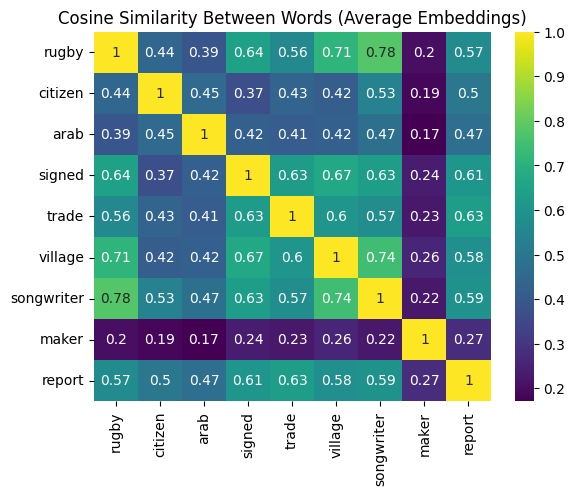

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Moyenne des embeddings par mot, en filtrant les vides
avg_embeddings = {}
for word, embs in all_embeddings.items():
    valid_embs = [emb for emb in embs if emb is not None and len(emb) > 0]
    if len(valid_embs) > 0:
        avg = np.mean(valid_embs, axis=0)
        if not np.any(np.isnan(avg)):  # s'assurer qu'il n'y a pas de NaN
            avg_embeddings[word] = avg

# Filtrage des mots valides seulement
words = list(avg_embeddings.keys())
embeddings_matrix = np.array([avg_embeddings[w] for w in words])

# Calcul de la matrice de similarité
similarity_matrix = cosine_similarity(embeddings_matrix)

# Affichage
sns.heatmap(similarity_matrix, xticklabels=words, yticklabels=words, annot=True, cmap="viridis")
plt.title("Cosine Similarity Between Words (Average Embeddings)")
plt.show()


### 🧭 t-SNE pour Embeddings BERT

/Users/ericcosterousse/.pyenv/versions/3.11.0/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


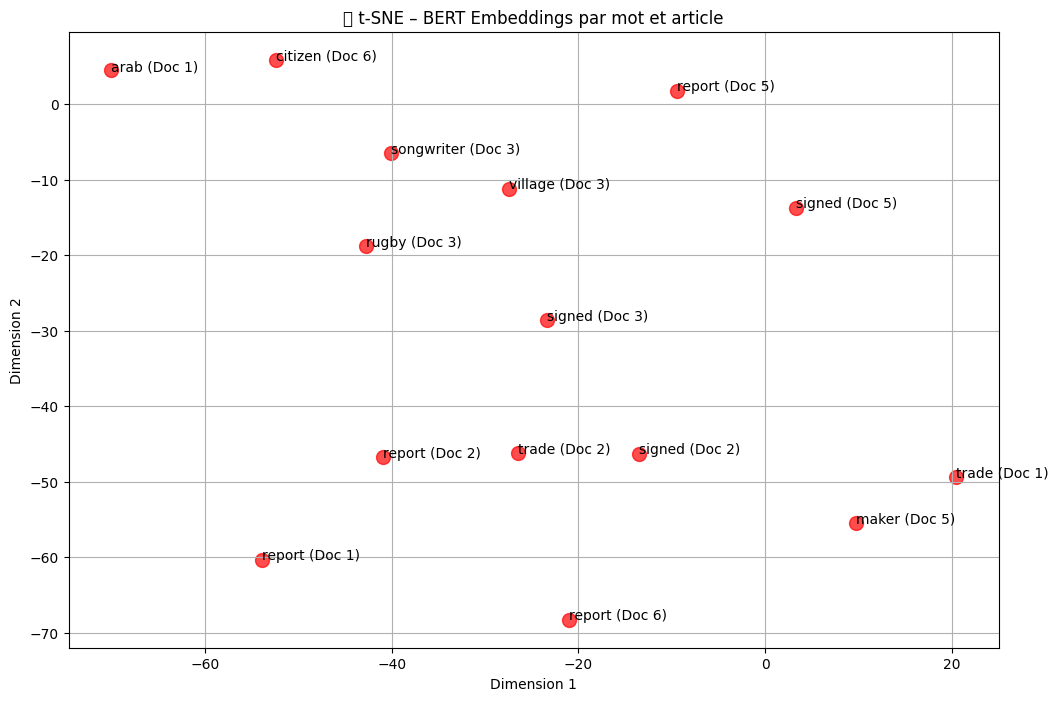

In [25]:
vectors = []
labels = []

for word, embs in all_embeddings.items():
    for i, emb in enumerate(embs):
        if emb is not None:
            vectors.append(emb)
            labels.append(f"{word} (Doc {i+1})")

if len(vectors) >= 2:
    X = np.array(vectors)
    perplexity_val = min(5, len(X) - 1)  # 5 est un bon choix par défaut
    
    X_2d = TSNE(n_components=2, random_state=42, perplexity=perplexity_val).fit_transform(X)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c='red', s=100, alpha=0.7)

    for i, label in enumerate(labels):
        plt.annotate(label, (X_2d[i, 0], X_2d[i, 1]), fontsize=10)

    plt.title("🧠 t-SNE – BERT Embeddings par mot et article")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)
    plt.show()
else:
    print("❌ Pas assez de vecteurs pour appliquer t-SNE.")


In [36]:
model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModel.from_pretrained(model_name)
bert_model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

In [37]:
def get_word_embedding(sentence, target_word):
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True, max_length=512)
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze())
    outputs = bert_model(**inputs)
    embeddings = outputs.last_hidden_state.squeeze(0)  # (seq_len, hidden_dim)

    target_word = target_word.lower()
    matched_indices = [i for i, token in enumerate(tokens) if target_word in token.lower()]
    
    if not matched_indices:
        return None
    
    selected_embeddings = embeddings[matched_indices, :]
    mean_embedding = selected_embeddings.mean(dim=0)
    return mean_embedding.detach().numpy()


In [42]:
def compute_embeddings(corpus, target_words):
    all_embeddings = {}
    for word in target_words:
        embeddings = []
        for text in corpus:
            emb = get_word_embedding(text, word)
            embeddings.append(emb)
        all_embeddings[word] = embeddings
    return all_embeddings


In [45]:
def save_embeddings_to_csv(all_embeddings, filename="embeddings.csv"):
    rows = []
    for word, embs in all_embeddings.items():
        for i, emb in enumerate(embs):
            if emb is not None:
                row = {"word": word, "doc_index": i}
                for j, val in enumerate(emb):
                    row[f"dim_{j}"] = val
                rows.append(row)
    df = pd.DataFrame(rows)
    df.to_csv(filename, index=False)
    print(f"✅ Embeddings sauvegardés dans {filename}")


In [47]:
# Mots cibles
#target_words = ["emirate", "citizen", "rugby", "arab", "trade"]

# Calcul des embeddings
#embeddings = compute_embeddings(corpus, target_words)

# Sauvegarde CSV
#save_embeddings_to_csv(embeddings, filename="../data/embeddings.csv")

✅ Embeddings sauvegardés dans ../data/embeddings.csv


In [48]:
# Calcul des embeddings
embeddings = compute_embeddings(corpus, vocabulaire)

# Sauvegarde CSV
save_embeddings_to_csv(embeddings, filename="../data/embeddings.csv")

✅ Embeddings sauvegardés dans ../data/embeddings.csv
